# Linear Attenuation Coefficient vs. Photon Energy
**Retrieve Data from NIST Website**
1. Go to the NIST XCOM website (https://physics.nist.gov/cgi-bin/Xcom/xcom2?Method=Comp&Output2=Hand).
2. Input the chemical formula or name of the mineral you want to analyze.
   1. Example: For quartz, enter SiO2.
3. Select the desired energy range for your calculation (e.g., 0.001 MeV to 100000 MeV).
4. Set delimiter to *space* and select all available datsets (i.e., Scattering (Coherent & Incoherent), Photoelectric Absorption, Pair Production (In Nuclear Field & In Electron Field), Total Attenuation (With Coherent Scattering & Without Coherent Scattering)) and *download data*.
5. Once the data is generated, download or copy the text output.
6. Open any text editor (e.g., Notepad on Windows, TextEdit on macOS, or VS Code).
7. Paste the data into the text editor.
8. Ensure the header follows the structure expected by the script: ["Photon Energy", "Coherent Scatter", "Incoherent Scatter", "Photoelectric Absorption", "Nuclear Pair Production", "Electron Pair Production", "Total with Coherent", "Total without Coherent"]
9. Save the file with the .txt extension with the corresponding mineral name: *NIST_quartz.txt*.
10. Ensure the encoding is UTF-8 (most text editors default to this).

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cmcrameri import cm

In [32]:
def calculate_linear_attenuation(filename, density, mass_attenuation_column="Total without Coherent"):
    """
    Calculate the linear attenuation coefficient (mu) from NIST data.

    Parameters:
        filename (str): Path to the NIST data file.
        density (float): Density of the material in g/cm³.
        mass_attenuation_column (str): Column name for mass attenuation coefficients (mu/rho).

    Returns:
        tuple: (photon_energy_kev, linear_attenuation_coeff)
            photon_energy_kev (array): Photon energies in keV.
            linear_attenuation_coeff (array): Linear attenuation coefficients in cm⁻¹.
    """
    # Load data
    data = np.loadtxt(filename, skiprows=2)
    header = ["Photon Energy", "Coherent Scatter", "Incoherent Scatter", 
              "Photoelectric Absorption", "Nuclear Pair Production", 
              "Electron Pair Production", "Total with Coherent", "Total without Coherent"]
    NIST_data = pd.DataFrame(data, columns=header)
    
    # Extract relevant data
    photon_energy_mev = NIST_data["Photon Energy"]  # in MeV
    mass_attenuation_coeff = NIST_data[mass_attenuation_column]  # mu/rho in cm²/g
    
    # Convert Photon Energy to keV
    photon_energy_kev = photon_energy_mev * 1e3  # Convert MeV to keV
    
    # Calculate Linear Attenuation Coefficient (mu)
    linear_attenuation_coeff = density * mass_attenuation_coeff
    
    return photon_energy_kev, linear_attenuation_coeff

def plot_linear_attenuation(datasets, xlim=(1, 400), ylim=(0, 100)):
    """
    Plot linear attenuation coefficients for multiple materials.

    Parameters:
        datasets (list of tuples): List of datasets where each dataset is a tuple 
                                   (photon_energy_kev, linear_attenuation_coeff, label).
        xlim (tuple): Limits for the x-axis (default is (1, 400)).
        ylim (tuple): Limits for the y-axis (default is (0, 100)).
    """
    plt.figure(figsize=(8, 6))
    
    # Define colors and line styles based on the number of datasets
    num_datasets = len(datasets)
    colors = cm.batlow(np.linspace(0, 1, num_datasets))
    line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--', '-.', ':']
    
    for i, (photon_energy_kev, linear_attenuation_coeff, label) in enumerate(datasets):
        plt.plot(photon_energy_kev, linear_attenuation_coeff, label=label, color=colors[i], linestyle=line_styles[i % len(line_styles)])
    
    # Customize the plot
    # plt.title("Linear Attenuation Coefficients for Various Materials", fontsize=16)
    plt.xlabel("Photon Energy (keV)", fontsize=14)
    plt.ylabel("Linear Attenuation Coefficient (cm$^{-1}$)", fontsize=14)
    plt.yscale("log")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()

/var/folders/jl/thv6zrvj5jv3y5xmtmbs6g0m0000gn/T/ipykernel_10436/2526189895.py:60: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(ylim)


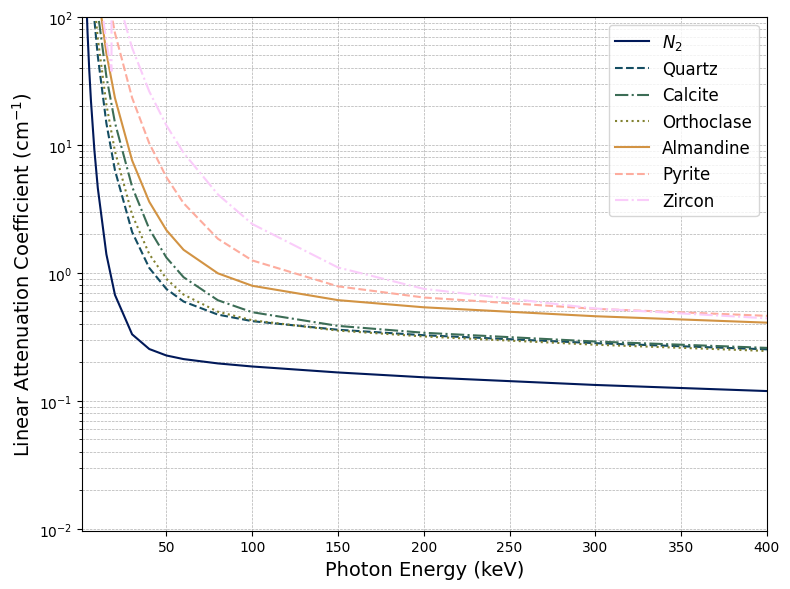

In [33]:
# For Nitrogen
nitrogen_file = "NIST_N2.txt"
nitrogen_density = 1.25  # g/cm³
photon_energy_kev_nitrogen, linear_attenuation_coeff_nitrogen = calculate_linear_attenuation(
    nitrogen_file, nitrogen_density)

# For Water
water_file = "NIST_H2O.txt"
water_density = 1.0  # g/cm³
photon_energy_kev_H2O, linear_attenuation_coeff_H2O = calculate_linear_attenuation(
    water_file, water_density)

# For Quartz
quartz_file = "NIST_quartz.txt"
quartz_density = 2.65  # g/cm³
photon_energy_kev_quartz, linear_attenuation_coeff_quartz = calculate_linear_attenuation(
    quartz_file, quartz_density)

# For Calcite
calcite_file = "NIST_calcite.txt"
calcite_density = 2.71  # g/cm³
photon_energy_kev_calcite, linear_attenuation_coeff_calcite = calculate_linear_attenuation(
    calcite_file, calcite_density)

# For Orthoclase
orthoclase_file = "NIST_orthoclase.txt"
orthoclase_density = 2.59  # g/cm³
photon_energy_kev_orthoclase, linear_attenuation_coeff_orthoclase = calculate_linear_attenuation(
    orthoclase_file, orthoclase_density)

# For Almandine
almandine_file = "NIST_almandine.txt"
almandine_density = 4.32  # g/cm³
photon_energy_kev_almandine, linear_attenuation_coeff_almandine = calculate_linear_attenuation(
    almandine_file, almandine_density)

# For Pyrite
pyrite_file = "NIST_pyrite.txt"
pyrite_density = 4.93  # g/cm³
photon_energy_kev_pyrite, linear_attenuation_coeff_pyrite = calculate_linear_attenuation(
    pyrite_file, pyrite_density)

# For Zircon
zircon_file = "NIST_zircon.txt"
zircon_density = 4.6  # g/cm³
photon_energy_kev_zircon, linear_attenuation_coeff_zircon = calculate_linear_attenuation(
    zircon_file, zircon_density)

# Combine data for plotting
datasets = [
    (photon_energy_kev_nitrogen, linear_attenuation_coeff_nitrogen, "$N_2$"),
    # (photon_energy_kev_H2O, linear_attenuation_coeff_H2O, "H2O"),
    (photon_energy_kev_quartz, linear_attenuation_coeff_quartz, "Quartz"),
    (photon_energy_kev_calcite, linear_attenuation_coeff_calcite, "Calcite"),
    (photon_energy_kev_orthoclase, linear_attenuation_coeff_orthoclase, "Orthoclase"),
    (photon_energy_kev_almandine, linear_attenuation_coeff_almandine, "Almandine"),
    (photon_energy_kev_pyrite, linear_attenuation_coeff_pyrite, "Pyrite"),
    (photon_energy_kev_zircon, linear_attenuation_coeff_zircon, "Zircon")
]

plot_linear_attenuation(datasets)